In [2]:
import scimap as sm
import anndata as ad
import pandas as pd



In [8]:
gate = pd.read_csv('/dss/dsshome1/00/ge65tib2/Scimap/gates_reg_002.csv')
gate.head()
adata= ad.read_h5ad("/dss/dsshome1/00/ge65tib2/Scimap/fresh_frozen_reg002_after_clustering.h5ad")
adata.obs['imageid'] = 'reg002_X01_Y01_Z01'


In [9]:
adata = sm.pp.rescale (adata, gate=gate)


/dss/dsshome1/00/ge65tib2/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/preprocessing/rescale.py:145: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`




Scaling Image: reg002_X01_Y01_Z01
Scaling Ki67 (gate: 0.154)
Scaling Keratin5 (gate: 0.197)
Scaling CD68 (gate: 1.625)
Scaling Podoplanin (gate: 0.553)
Scaling SMA (gate: 2.281)
Scaling CD107a (gate: 0.996)
Scaling CLDN17 (gate: 1.398)
Scaling CD34 (gate: 0.455)
Scaling HLA-DR (gate: 0.813)


In [12]:
phenotype = pd.read_csv('/dss/dsshome1/00/ge65tib2/Scimap/phenotype_workflow_fresh_frozen.csv', sep=';')
phenotype.style.format(na_rep='')


,Unnamed: 0,Unnamed: 1,CD68,SMA,Podoplanin,CD34,CD107a,Ki67,CLDN17,Keratin5,HLA-DR
0,all,myCAFs,,pos,,,,,,,
1,all,myCAFs,,,pos,,,,,,
2,all,Endothelial cells,,,,pos,,,,,
3,all,basal tumor cells,,,,,,,,pos,
4,Immune,CD8+ T or NK cells,,,,,pos,,,,
5,Immune,Macrophages,pos,,,,,,,,
6,all,APC,,,,,,,,,pos
7,all,Proliferating,,,,,,pos,,,
8,all,classical tumor cells,,,,,,,pos,,


In [13]:
adata = sm.tl.phenotype_cells (adata, phenotype=phenotype, label="phenotype") 

Phenotyping myCAFs
Phenotyping Endothelial cells
Phenotyping basal tumor cells
Phenotyping APC
Phenotyping Proliferating
Phenotyping classical tumor cells
Consolidating the phenotypes across all groups


/dss/dsshome1/00/ge65tib2/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

/dss/dsshome1/00/ge65tib2/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/tools/phenotype_cells.py:290: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [14]:
adata.obs['phenotype'].value_counts()


phenotype
Unknown                  28001
classical tumor cells    11497
myCAFs                    8493
APC                       5082
Endothelial cells         4067
basal tumor cells          609
Proliferating              256
Name: count, dtype: int64

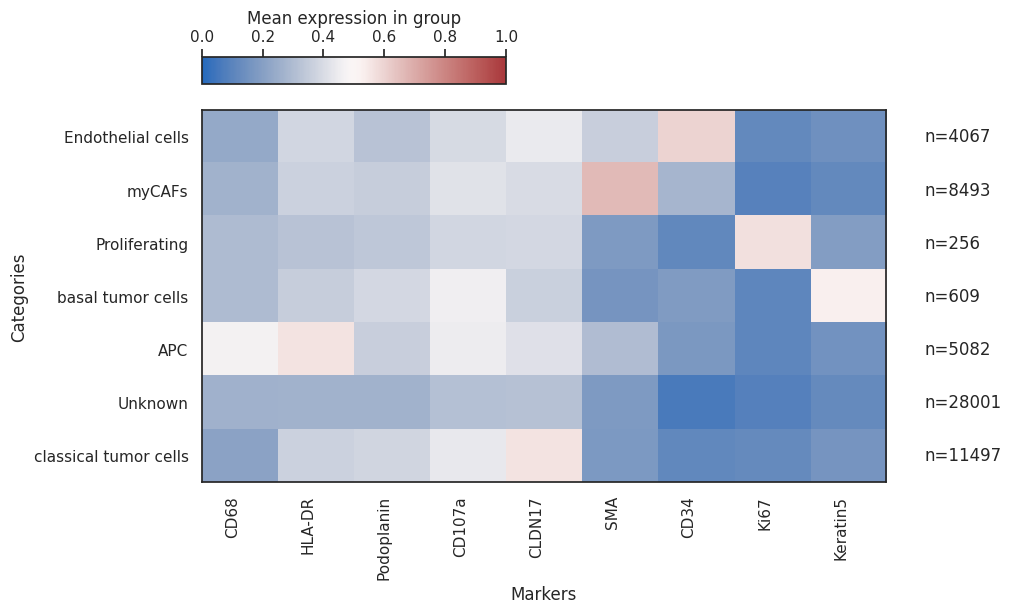

In [15]:
sm.pl.heatmap(adata, groupBy='phenotype', standardScale=None, figsize=(10,6), showPrevalence=True, vmin=0, vmax=1)


In [16]:
adata = sm.tl.umap(adata)


/dss/dsshome1/00/ge65tib2/miniconda3/envs/scimap/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/dss/dsshome1/00/ge65tib2/miniconda3/envs/scimap/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



/dss/dsshome1/00/ge65tib2/miniconda3/envs/scimap/lib/python3.10/site-packages/scimap/plotting/umap.py:304: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



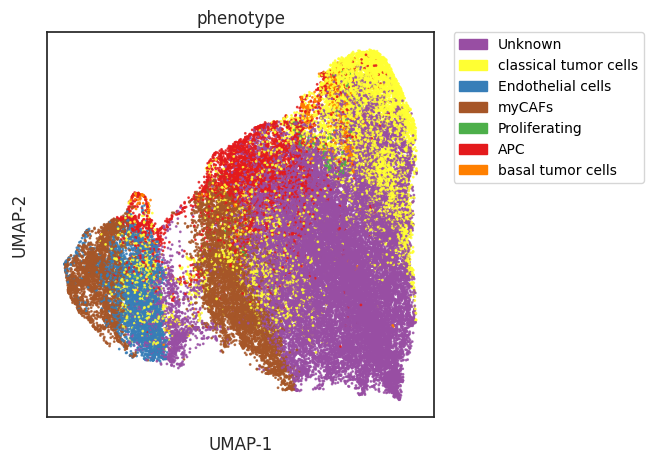

In [17]:
sm.pl.umap(adata, color=['phenotype'], s=1)


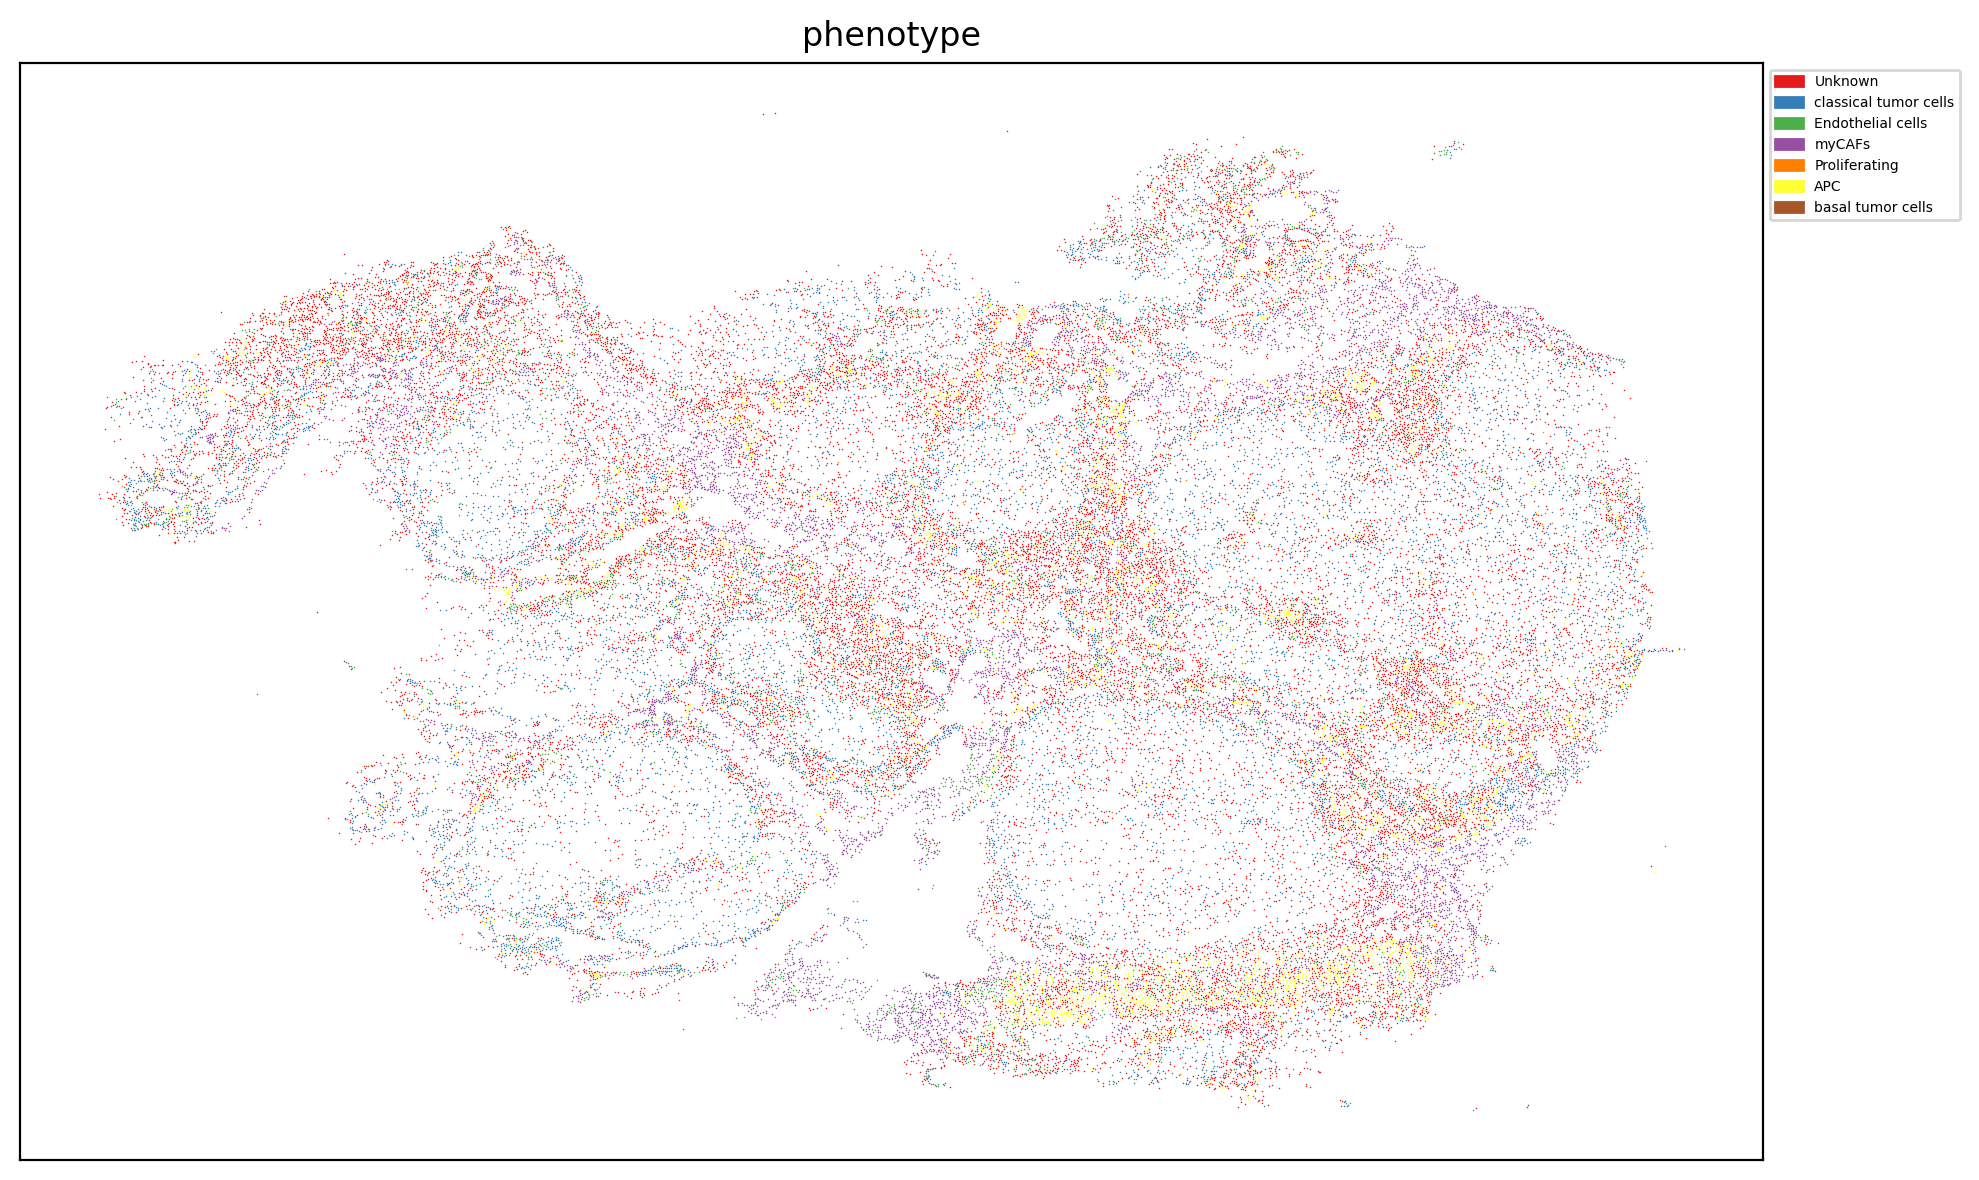

In [22]:
sm.pl.spatial_scatterPlot(
    adata,
    colorBy=['phenotype'],
    x_coordinate='centroid-0',
    y_coordinate='centroid-1',
    figsize=(10, 6),
    s=0.3,
    fontsize=5,
    catCmap='Set1'
)